In [1]:
import collections
import csv
import functools
import operator
from collections import Counter
from random import randint

import matplotlib.pyplot as plt
import numpy as np


In [2]:
class Player:

    def __init__(self, name, position, movements):
        self.name = name
        self.position = position
        self.movements = movements

    def give_name(self):
        return self.name

    def give_position(self):
        return self.position

    def give_movements(self):
        return self.movements

    def change_position(self, new_pos):
        self.position = new_pos

    def update_movements(self, mov):
        self.movements.append(mov)


In [3]:
def roll(player):
    d1 = randint(1, 6)
    d2 = randint(1, 6)
    player.change_position((player.give_position()+d1+d2) % 40)


In [4]:
p1 = Player("P1", 0, [])
p2 = Player("P2", 0, [])
p3 = Player("P3", 0, [])
p4 = Player("P4", 0, [])

p1_games = []
p2_games = []
p3_games = []
p4_games = []

player_list = [p1, p2, p3, p4]
pos_list = np.arange(0, 41)


In [5]:
def game(player_list):
    for var in range(0, 50):
        for player in player_list:
            roll(player)
            player.update_movements(player.give_position())


In [6]:
# Simulate games and save the movements on pn_games
def simulate_games(n):
    for var in range(n):
        p1 = Player("P1", 0, [])
        p2 = Player("P2", 0, [])
        p3 = Player("P3", 0, [])
        p4 = Player("P4", 0, [])

        player_list = [p1, p2, p3, p4]

        game(player_list)

        p1_games.append(dict(Counter(p1.give_movements())))
        p2_games.append(dict(Counter(p2.give_movements())))
        p3_games.append(dict(Counter(p3.give_movements())))
        p4_games.append(dict(Counter(p4.give_movements())))

        del p1, p2, p3, p4


In [7]:
simulate_games(10000)


In [8]:
# Created a counter to meassure the number of times a player lands on a specific position
counter = Counter()

for d in p1_games:
    counter.update(d)

for d in p2_games:
    counter.update(d)

for d in p3_games:
    counter.update(d)

for d in p4_games:
    counter.update(d)


In [9]:
stats = {}
for i in sorted(counter):
    stats[i] = counter[i]


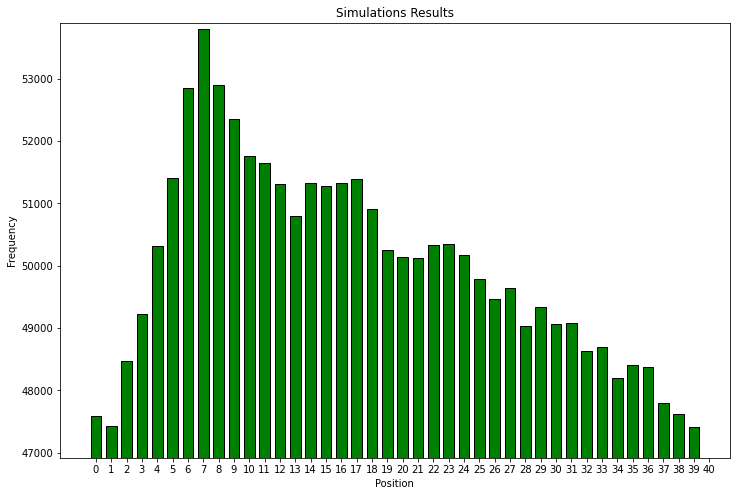

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.bar(list(stats.keys()), list(stats.values()), color='g',
        width=0.7, align='center', edgecolor='black')
plt.title("Simulations Results")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.ylim(min(list(stats.values()))-500, max(list(stats.values()))+100)
plt.xticks(pos_list)
plt.show()


In [11]:
s = sum(stats.values())
dic = {}
for k, v in stats.items():
    pct = v * 100.0 / s
    dic[k] = pct


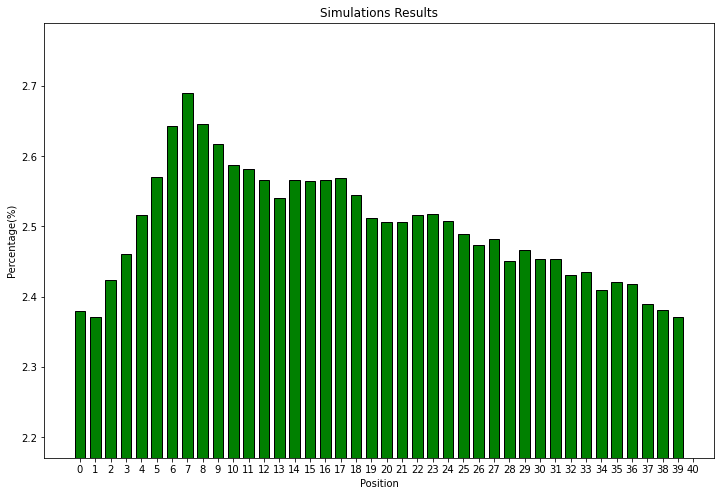

In [12]:
fig = plt.figure(figsize=(12, 8))
plt.bar(list(dic.keys()), list(dic.values()), color='g',
        width=0.7, align='center', edgecolor='black')
plt.title("Simulations Results")
plt.xlabel("Position")
plt.ylabel("Percentage(%)")
plt.ylim(min(list(dic.values()))-0.2, max(list(dic.values()))+0.1)
plt.xticks(pos_list)
plt.show()
